<a href="https://colab.research.google.com/github/Rish-5k/RishRepository/blob/main/Final_Thesis_Analysis3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
 !pip install dataprep
from dataprep.eda import plot, plot_correlation, create_report, plot_missing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 87.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [3]:
df = pd.read_csv("/content/marketing_campaign.csv", sep='\t')
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
num_rows, num_cols = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 2240
Number of columns: 29


In [5]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

In [6]:
print(missing_values)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [7]:
df["Income"]

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64

In [8]:
print("Number of missing income values:", df["Income"].isnull().sum())

Number of missing income values: 24


In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Split the data into two sets: one with missing income values and one without missing income values
df_missing = df[df["Income"].isnull()]
df_not_missing = df[~df["Income"].isnull()]

# Preprocess the data (e.g., handle missing values in other columns, encode categorical variables)
df_encoded = pd.get_dummies(df_not_missing)

# Split the data with non-missing income values into features (X_train) and target (y_train)
X_train = df_encoded.drop("Income", axis=1)
y_train = df_encoded["Income"]

# Split the data with missing income values into features (X_test)
X_test = pd.get_dummies(df_missing)

# Reindex the test data columns to match the training data columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Create and fit the regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict the missing income values
predicted_income = reg_model.predict(X_test)

# Fill the missing income values in the original dataset
df.loc[df["Income"].isnull(), "Income"] = predicted_income

In [10]:
missing_values = df.isnull().sum()
print(missing_values)

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


<Figure size 1000x600 with 0 Axes>

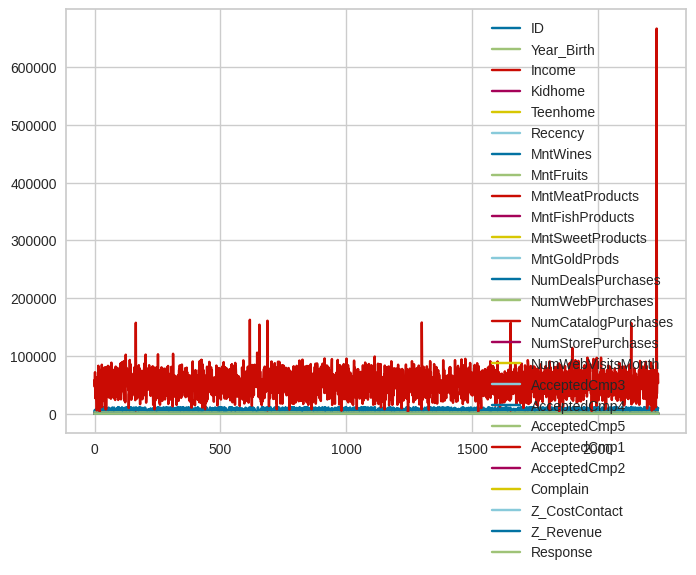

In [11]:
plt.figure(figsize=(10, 6))

# Plot the DataFrame
df.plot()

# Display the plot
plt.show()


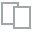
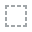
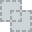
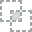
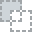
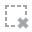
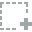
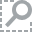
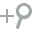
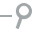
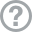
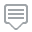
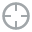
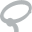
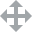
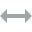
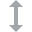
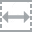
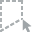
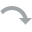
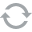
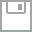
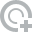
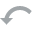
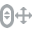
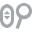
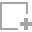
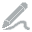
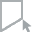
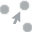
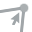
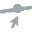

In [12]:
# Plot histograms, scatter plots, and other visualizations
plot(df)

In [13]:
stats = df.describe(include='all')
print(stats)

                  ID   Year_Birth   Education Marital_Status         Income  \
count    2240.000000  2240.000000        2240           2240    2240.000000   
unique           NaN          NaN           5              8            NaN   
top              NaN          NaN  Graduation        Married            NaN   
freq             NaN          NaN        1127            864            NaN   
mean     5592.159821  1968.805804         NaN            NaN   52240.683344   
std      3246.662198    11.984069         NaN            NaN   25112.994609   
min         0.000000  1893.000000         NaN            NaN    1730.000000   
25%      2828.250000  1959.000000         NaN            NaN   35303.000000   
50%      5458.500000  1970.000000         NaN            NaN   51342.000000   
75%      8427.750000  1977.000000         NaN            NaN   68487.000000   
max     11191.000000  1996.000000         NaN            NaN  666666.000000   

            Kidhome     Teenhome Dt_Customer      R

In [65]:
df = df.drop(df[(df['Year_Birth'] < 1940) |
                      (df['Income'] > 150000)].index)

In [66]:
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']

[Text(0.5, 1.0, 'Age Frequency Histogram')]

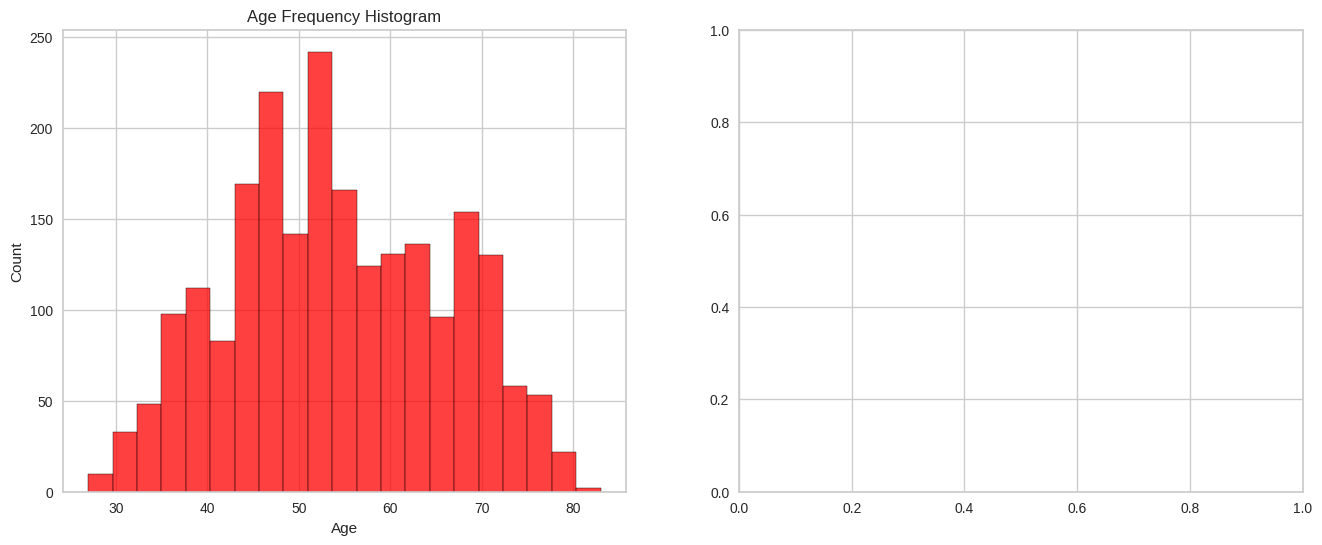

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data=df['Age'], ax=axes[0], color='red')
axes[0].set(title='Age Frequency Histogram')

In [17]:
# Calculate total amount spent
df['Total_Amount_Spent'] = df.filter(like='Mnt').sum(axis=1)

# Calculate total purchases
df['Total_Purchases'] = df.filter(regex='Num[^Deals].+Purchases').sum(axis=1)


In [20]:
print(df.columns) 

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Amount_Spent', 'Total_Purchases'],
      dtype='object')


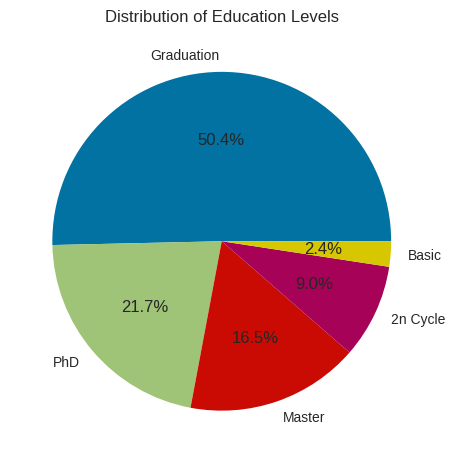

In [22]:
# Count the frequency of each education level
education_counts = df['Education'].value_counts()

# Create a pie chart
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Education Levels')
plt.show()

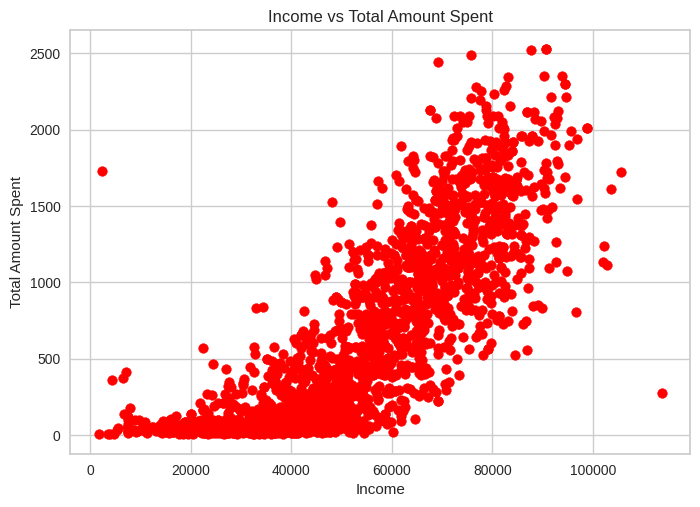

In [68]:
# Plotting income vs total amount spent
plt.scatter(df['Income'], df['Total_Amount_Spent'], color='red')
plt.xlabel('Income')
plt.ylabel('Total Amount Spent')
plt.title('Income vs Total Amount Spent')
plt.show()

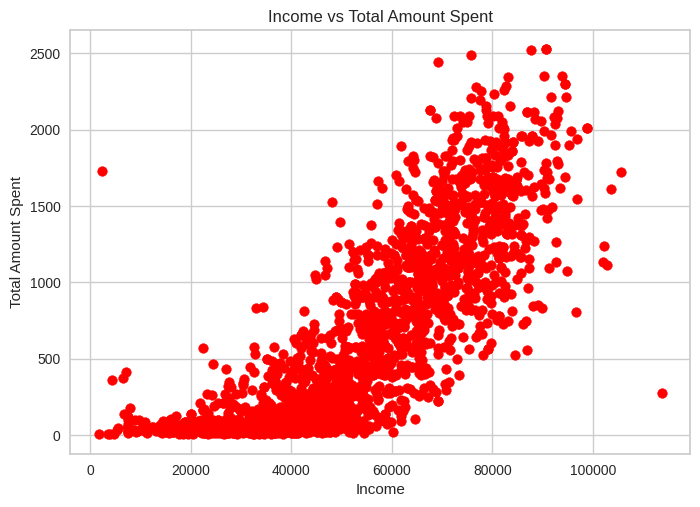

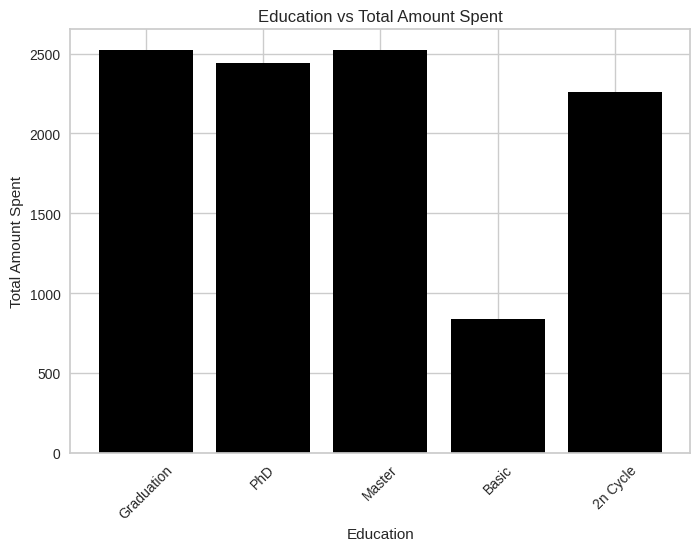

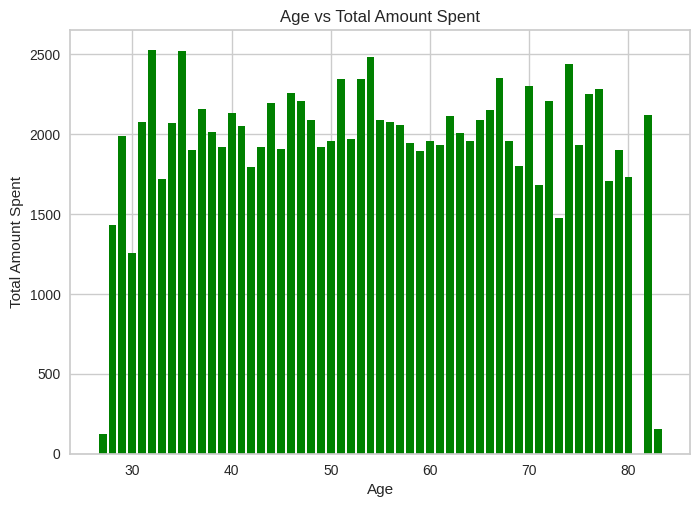

In [69]:
# Plotting income vs total amount spent
plt.scatter(df['Income'], df['Total_Amount_Spent'], color='red')
plt.xlabel('Income')
plt.ylabel('Total Amount Spent')
plt.title('Income vs Total Amount Spent')
plt.show()

# Plotting education vs total amount spent
plt.bar(df['Education'], df['Total_Amount_Spent'], color='black')
plt.xlabel('Education')
plt.ylabel('Total Amount Spent')
plt.title('Education vs Total Amount Spent')
plt.xticks(rotation=45)
plt.show()

# Plotting age vs total amount spent
plt.bar(df['Age'], df['Total_Amount_Spent'], color='green')
plt.xlabel('Age')
plt.ylabel('Total Amount Spent')
plt.title('Age vs Total Amount Spent')
plt.show()

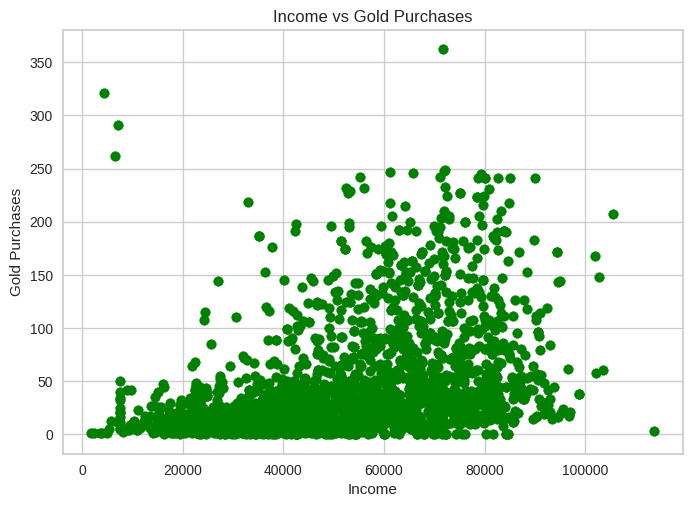

In [70]:
# Plotting income vs gold
plt.scatter(df['Income'], df['MntGoldProds'], color='green' )
plt.xlabel('Income')
plt.ylabel('Gold Purchases')
plt.title('Income vs Gold Purchases')
plt.show()

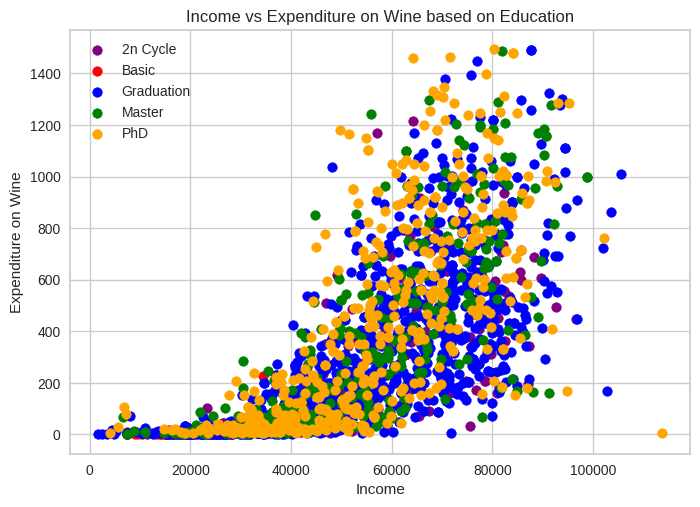

In [71]:
import matplotlib.pyplot as plt

# Define colors for each education category
colors = {'Basic': 'red', 'Graduation': 'blue', 'Master': 'green', 'PhD': 'orange', '2n Cycle': 'purple'}

# Plotting income vs expenditure on wine based on education
for education, group in df.groupby('Education'):
    plt.scatter(group['Income'], group['MntWines'], color=colors[education], label=education)

plt.xlabel('Income')
plt.ylabel('Expenditure on Wine')
plt.title('Income vs Expenditure on Wine based on Education')
plt.legend()
plt.show()

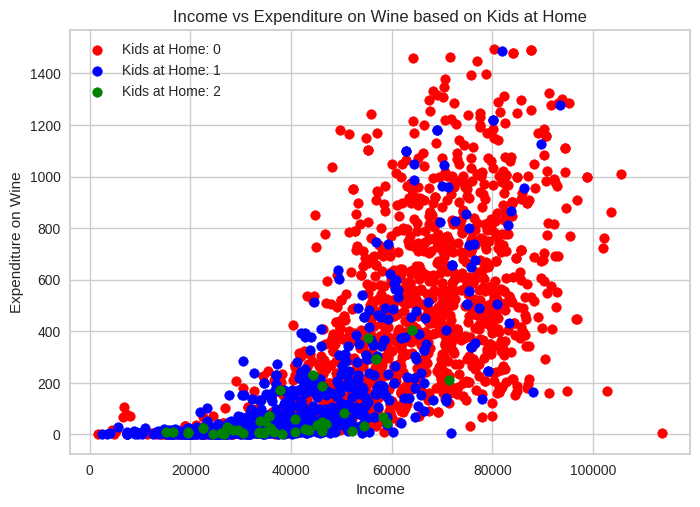

In [72]:
import matplotlib.pyplot as plt

# Define colors for each kids at home category
colors = {0: 'red', 1: 'blue', 2: 'green'}

# Plotting income vs expenditure on wine based on kids at home
for kids, group in df.groupby('Kidhome'):
    plt.scatter(group['Income'], group['MntWines'], color=colors[kids], label=f'Kids at Home: {kids}')

plt.xlabel('Income')
plt.ylabel('Expenditure on Wine')
plt.title('Income vs Expenditure on Wine based on Kids at Home')
plt.legend()
plt.show()

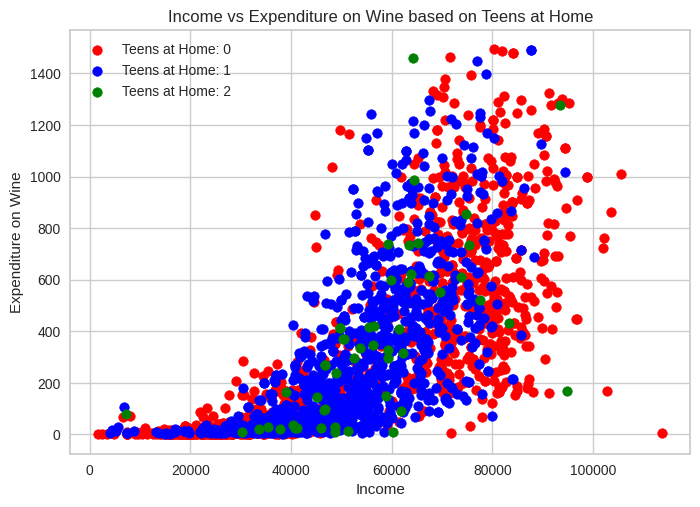

In [73]:
# Define colors for each teens at home category
colors = {0: 'red', 1: 'blue', 2: 'green'}

# Plotting income vs expenditure on wine based on teens at home
for teens, group in df.groupby('Teenhome'):
    if teens in colors:
        plt.scatter(group['Income'], group['MntWines'], color=colors[teens], label=f'Teens at Home: {teens}')

plt.xlabel('Income')
plt.ylabel('Expenditure on Wine')
plt.title('Income vs Expenditure on Wine based on Teens at Home')
plt.legend()
plt.show()

In [74]:
df['Childhome'] = df['Teenhome'] + df['Kidhome']

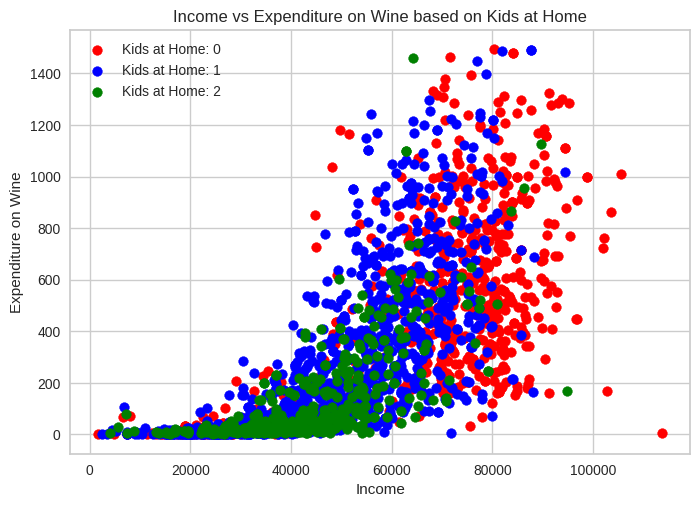

In [75]:
# Define colors for each kids at home category
colors = {0: 'red', 1: 'blue', 2: 'green'}

# Plotting income vs expenditure on wine based on kids at home
for kids, group in df.groupby('Childhome'):
    if kids in colors:
        plt.scatter(group['Income'], group['MntWines'], color=colors[kids], label=f'Kids at Home: {kids}')

plt.xlabel('Income')
plt.ylabel('Expenditure on Wine')
plt.title('Income vs Expenditure on Wine based on Kids at Home')
plt.legend()
plt.show()

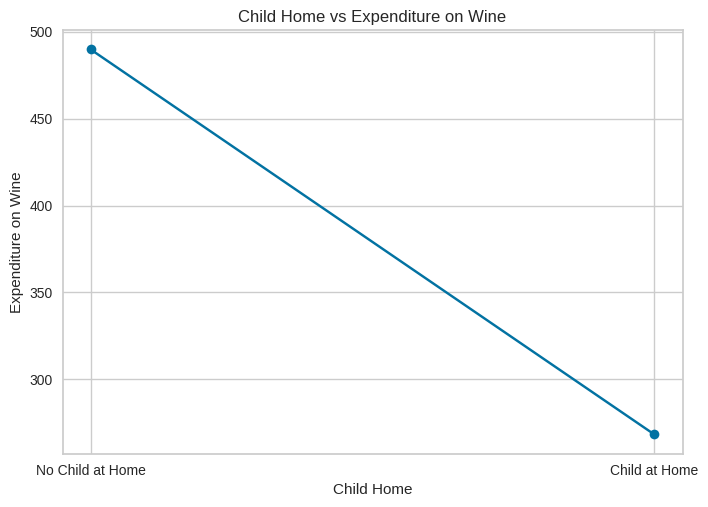

In [76]:
import matplotlib.pyplot as plt

# Define labels for each child home category
labels = {0: 'No Child at Home', 1: 'Child at Home'}

# Initialize lists for x-axis and y-axis data
x_data = []
y_data = []

# Collect data for plotting
for childhome, group in df.groupby('Childhome'):
    if childhome in labels:
        x_data.append(labels[childhome])
        y_data.append(group['MntWines'].mean())

# Plotting child home vs expenditure on wine
plt.plot(x_data, y_data, marker='o')
plt.xlabel('Child Home')
plt.ylabel('Expenditure on Wine')
plt.title('Child Home vs Expenditure on Wine')
plt.show()

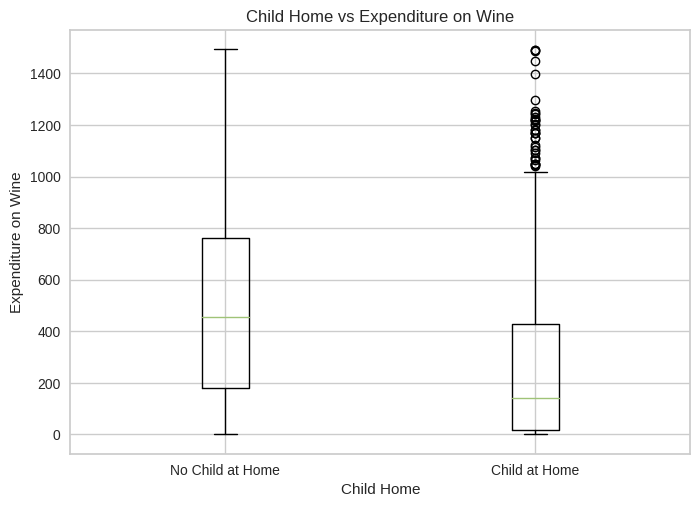

In [77]:
import matplotlib.pyplot as plt

# Define labels for each child home category
labels = {0: 'No Child at Home', 1: 'Child at Home'}

# Initialize lists for x-axis and y-axis data
x_data = []
y_data = []

# Collect data for plotting
for childhome, group in df.groupby('Childhome'):
    if childhome in labels:
        x_data.append(labels[childhome])
        y_data.append(group['MntWines'])

# Plotting child home vs expenditure on wine
plt.boxplot(y_data, labels=x_data)
plt.xlabel('Child Home')
plt.ylabel('Expenditure on Wine')
plt.title('Child Home vs Expenditure on Wine')
plt.show()

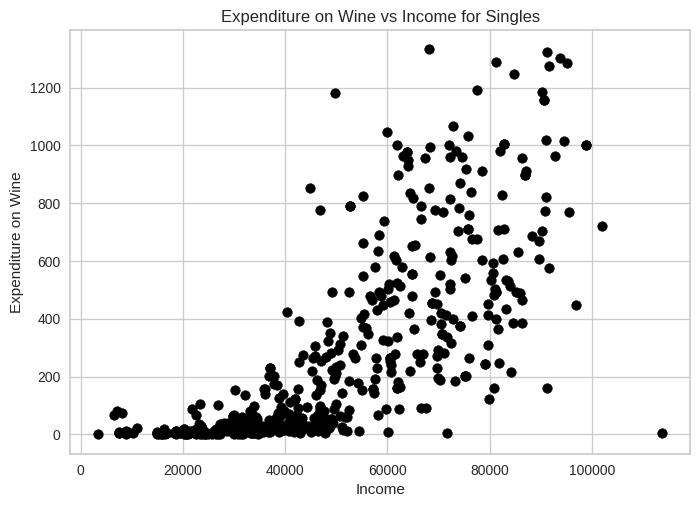

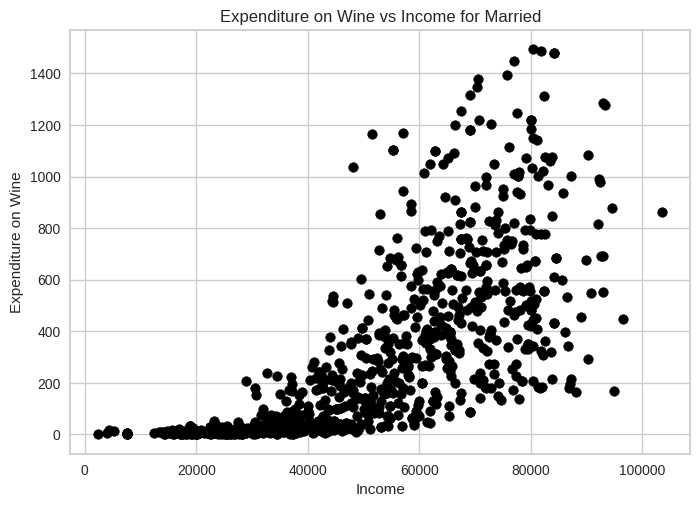

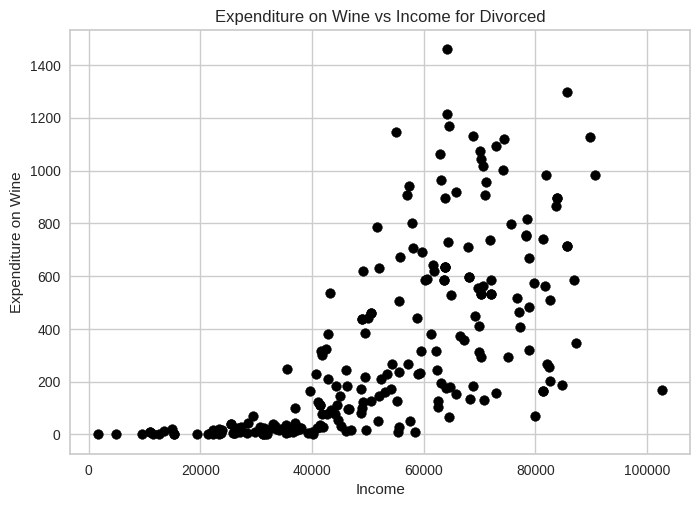

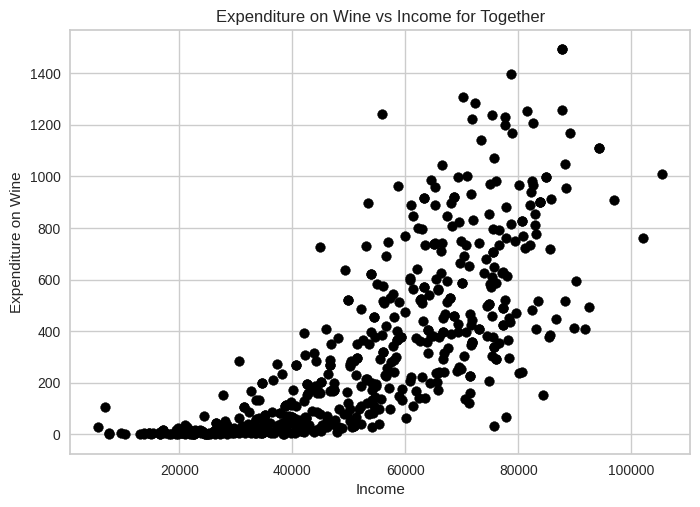

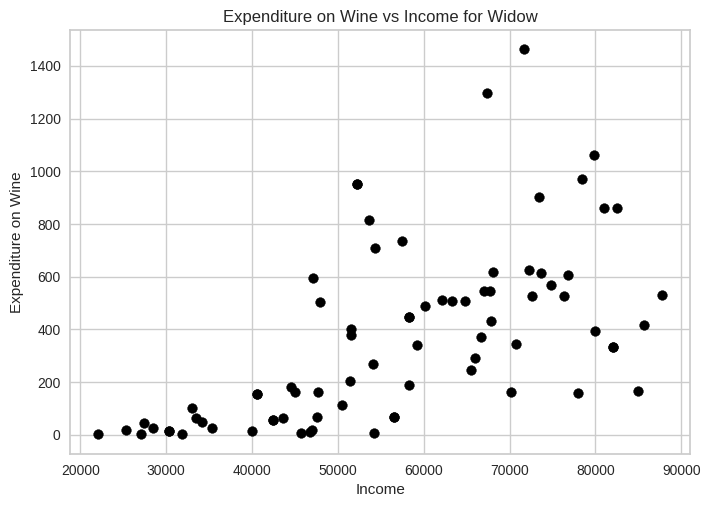

In [78]:
import matplotlib.pyplot as plt

# Plotting expenditure on wine vs income for all marital statuses
plt.scatter(df[df['Marital_Status'] == 'Single']['Income'], df[df['Marital_Status'] == 'Single']['MntWines'], color='black')
plt.xlabel('Income')
plt.ylabel('Expenditure on Wine')
plt.title('Expenditure on Wine vs Income for Singles')
plt.show()

plt.scatter(df[df['Marital_Status'] == 'Married']['Income'], df[df['Marital_Status'] == 'Married']['MntWines'], color='black')
plt.xlabel('Income')
plt.ylabel('Expenditure on Wine')
plt.title('Expenditure on Wine vs Income for Married')
plt.show()

plt.scatter(df[df['Marital_Status'] == 'Divorced']['Income'], df[df['Marital_Status'] == 'Divorced']['MntWines'], color='black')
plt.xlabel('Income')
plt.ylabel('Expenditure on Wine')
plt.title('Expenditure on Wine vs Income for Divorced')
plt.show()

plt.scatter(df[df['Marital_Status'] == 'Together']['Income'], df[df['Marital_Status'] == 'Together']['MntWines'], color='black')
plt.xlabel('Income')
plt.ylabel('Expenditure on Wine')
plt.title('Expenditure on Wine vs Income for Together')
plt.show()

plt.scatter(df[df['Marital_Status'] == 'Widow']['Income'], df[df['Marital_Status'] == 'Widow']['MntWines'], color='black')
plt.xlabel('Income')
plt.ylabel('Expenditure on Wine')
plt.title('Expenditure on Wine vs Income for Widow')
plt.show()

In [79]:
sales_channel = df[['NumStorePurchases','NumWebPurchases','NumCatalogPurchases']]
sales_channel = pd.melt(sales_channel, value_vars=['NumStorePurchases','NumWebPurchases','NumCatalogPurchases'],
                        var_name='Channel',value_name='No_Transactions')
channel_grp = sales_channel.groupby('Channel')
sc_df = channel_grp[['No_Transactions']].sum()
sc_df

No_Transactions
Channel                             
NumCatalogPurchases             5877
NumStorePurchases              12956
NumWebPurchases                 9139

Text(0.5, 1.0, 'Most Used Sales Channel')

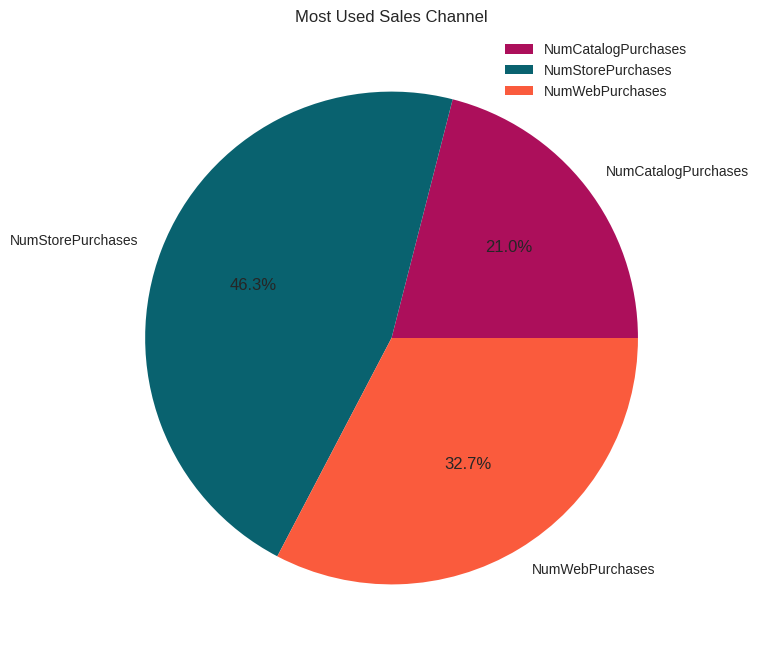

In [80]:
plt.figure(figsize=(16,8))
plt.pie(x=sc_df.No_Transactions,labels=sc_df.index,colors=['#ac0f5b','#09626f','#fa5b3d'],autopct='%1.1f%%')
plt.legend()
plt.title('Most Used Sales Channel')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

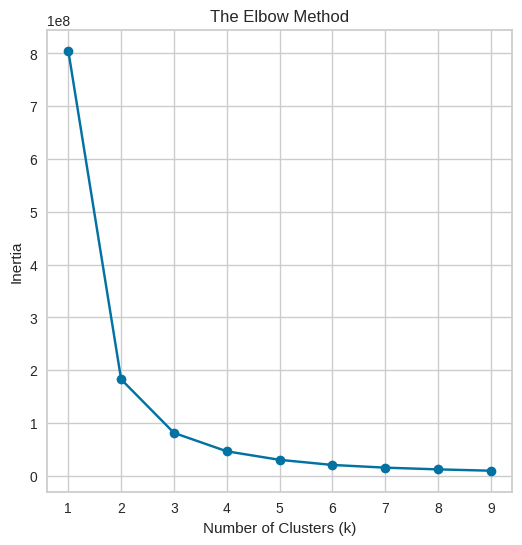

In [81]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
possible_k_values = range(1, 10)
features = ['Age', 'Total_Amount_Spent', 'Total_Purchases']

for k in possible_k_values:
    model = KMeans(n_clusters=k, random_state=20, init='k-means++').fit(df[features])
    inertias.append(model.inertia_)

plt.figure(figsize=(6, 6))
plt.title("The Elbow Method")
plt.plot(possible_k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


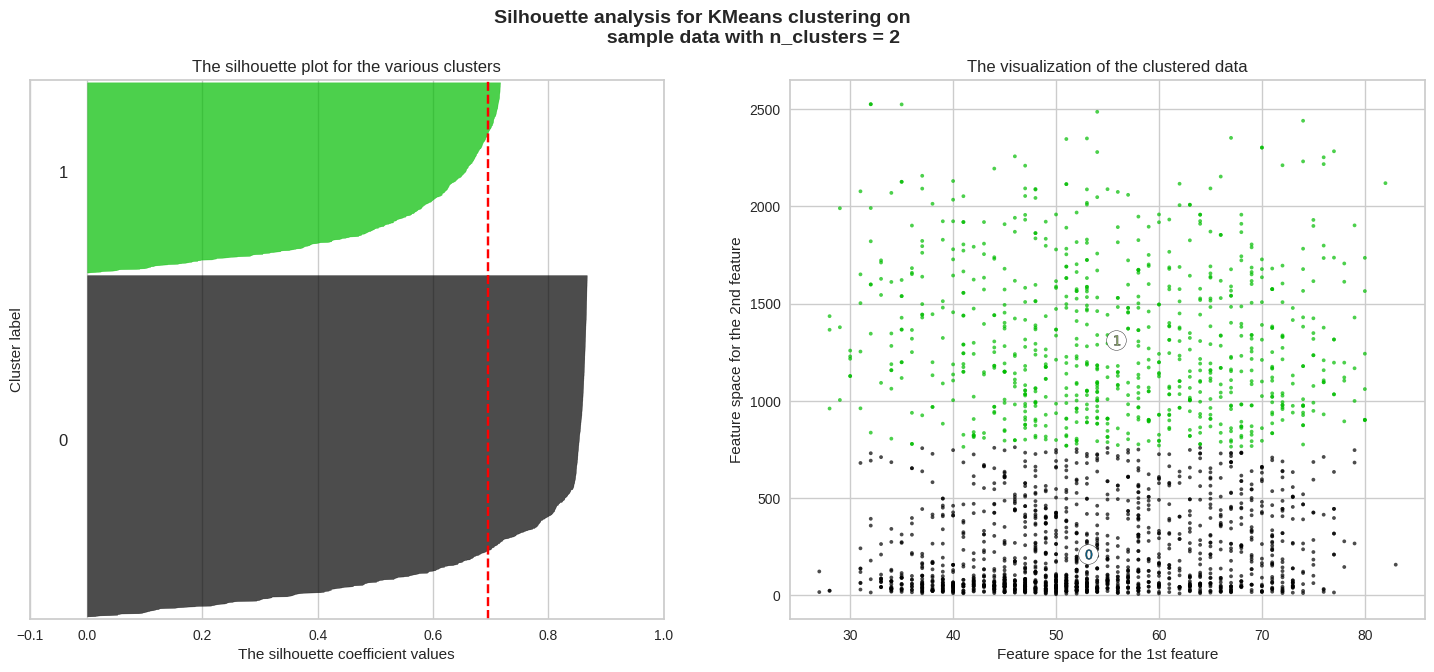

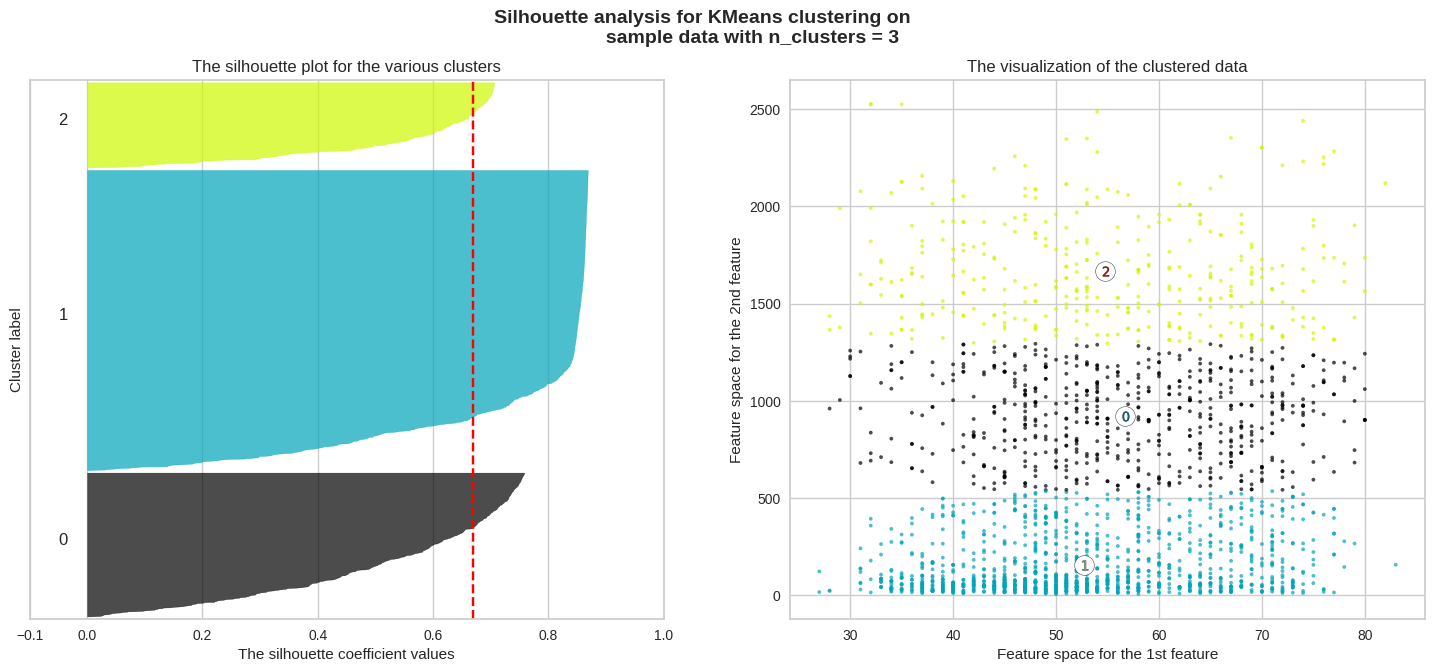

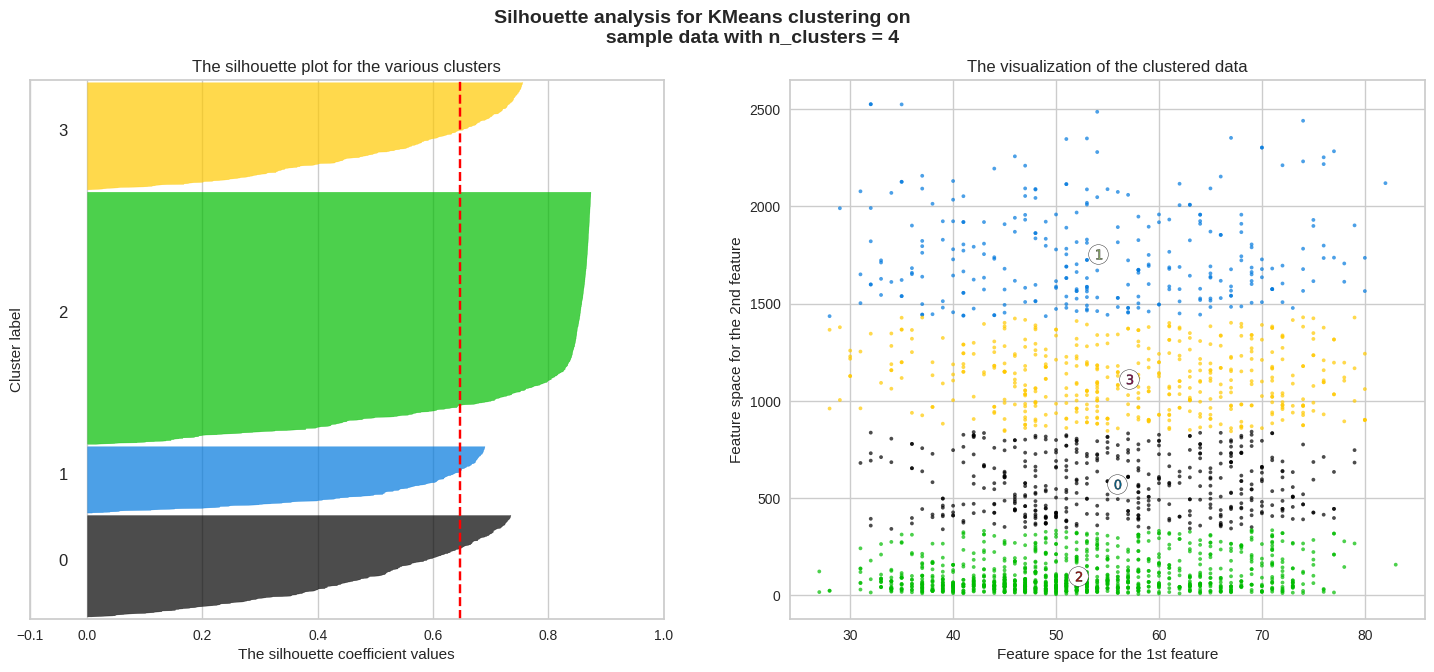

In [82]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

reduced_possible_k_values = range(2, 5)
features = ['Age', 'Total_Amount_Spent', 'Total_Purchases']

for k in reduced_possible_k_values:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df[features]) + (k + 1) * 10])

    model = KMeans(n_clusters=k, random_state=10)
    cluster_labels = model.fit_predict(df[features])
    silhouette_avg = silhouette_score(df[features], cluster_labels)
    sample_silhouette_values = silhouette_samples(df[features], cluster_labels)

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0,
                          ith_cluster_silhouette_values, facecolor=color,
                          edgecolor=color, alpha=0.7,)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
    ax2.scatter(df[features].iloc[:, 0], df[features].iloc[:, 1], 
                marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    centers = model.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white",
                alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle('''Silhouette analysis for KMeans clustering on 
                  sample data with n_clusters = %d'''
                  % k, fontsize=14, fontweight="bold")

plt.show()

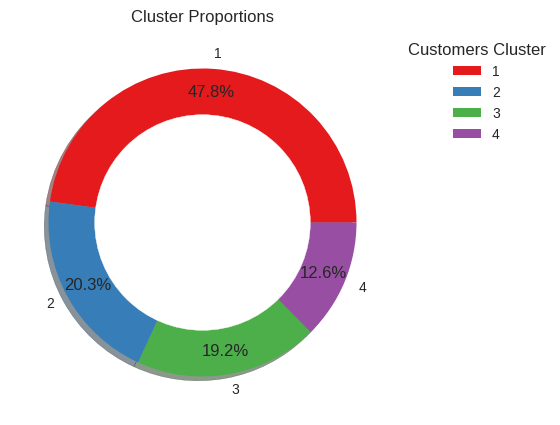

In [83]:
preds = model.predict(df[features])
clusters = df.copy()
clusters['Cluster'] = preds + 1

cluster_size = dict(clusters['Cluster'].value_counts())

plt.figure(figsize=(5, 5))
plt.title("Cluster Proportions")
plt.pie(cluster_size.values(), labels=sorted(cluster_size.keys()),
        autopct="%.1f%%", pctdistance=0.85, shadow=True,
        colors=sns.color_palette("Set1"))
plt.legend(title="Customers Cluster", labels=sorted(cluster_size.keys()), bbox_to_anchor=(1, 1))

donut = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(donut)

plt.show()

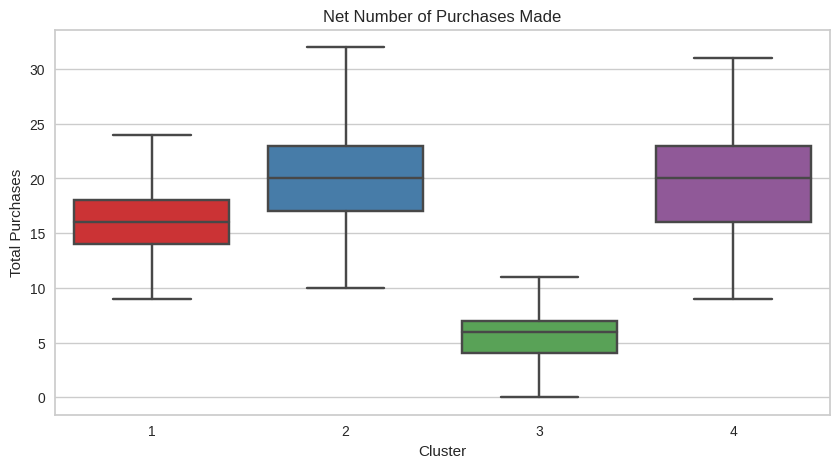

In [84]:
plt.figure(figsize=(10, 5))
plt.title('Net Number of Purchases Made')
ax = sns.boxplot(data=clusters, x='Cluster', y='Total_Purchases', palette=sns.color_palette('Set1'), showfliers=False)
plt.xlabel('Cluster')
plt.ylabel('Total Purchases')
plt.show()

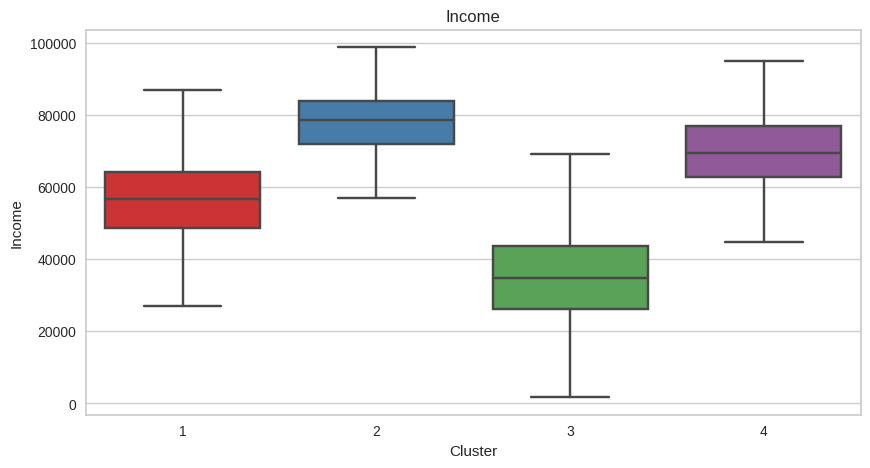

In [85]:
plt.figure(figsize=(10, 5))
plt.title('Income')
axes = sns.boxplot(data=clusters, x='Cluster', y='Income', palette=sns.color_palette('Set1'), showfliers=False)
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.show()


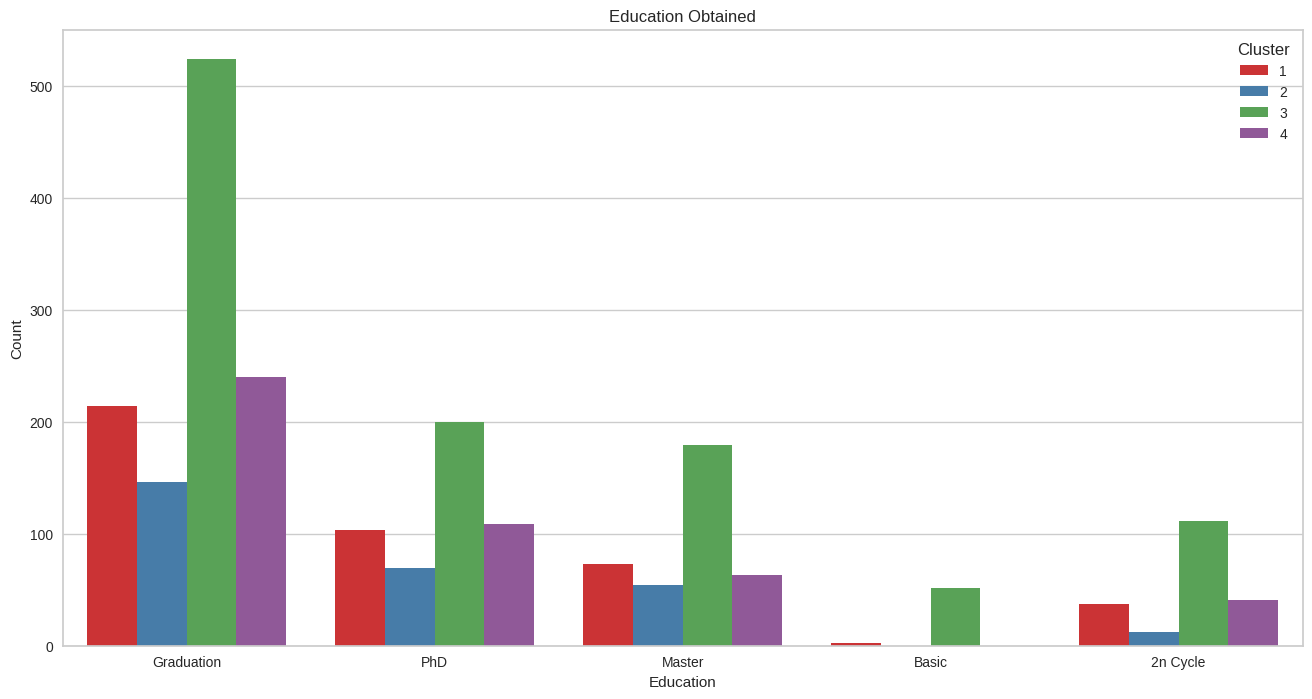

In [86]:
plt.figure(figsize=(16, 8))
plt.title('Education Obtained')

# Define a custom color palette for each cluster
cluster_colors = sns.color_palette('Set1', n_colors=len(cluster_size))

sns.countplot(data=clusters, x='Education', hue='Cluster', palette=cluster_colors)

plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

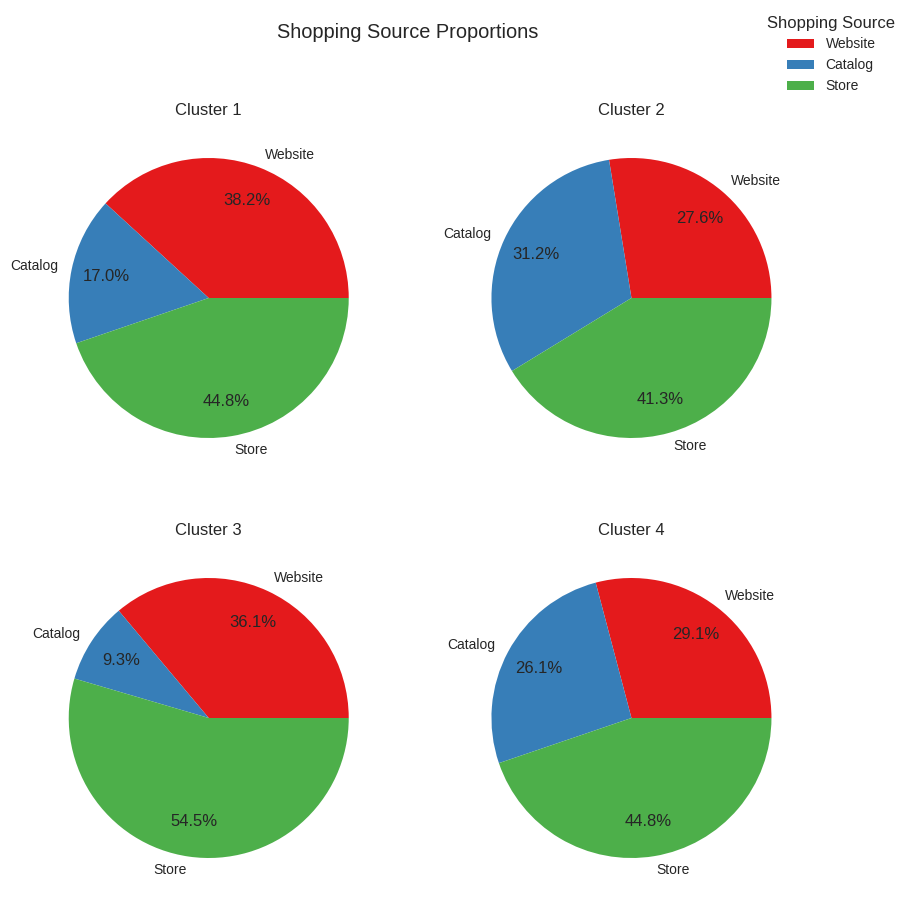

In [87]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
k = 0
cluster_colors = sns.color_palette('Set1', n_colors=len(cluster_size))

for i in range(0, 2):
    for j in range(0, 2):
        k += 1
        num = clusters.query(f'Cluster == {k}').filter(regex='Num[^Deals|Total].+Purchases').sum(axis=0)
        sizes = dict(num)
        axes[i, j].set_title(f"Cluster {k}")
        axes[i, j].pie(sizes.values(), labels=['Website', 'Catalog', 'Store'], autopct="%.1f%%", pctdistance=0.75, colors=cluster_colors)

fig.suptitle('Shopping Source Proportions')
fig.legend(title="Shopping Source", labels=['Website', 'Catalog', 'Store'], bbox_to_anchor=(1, 1))
plt.show()

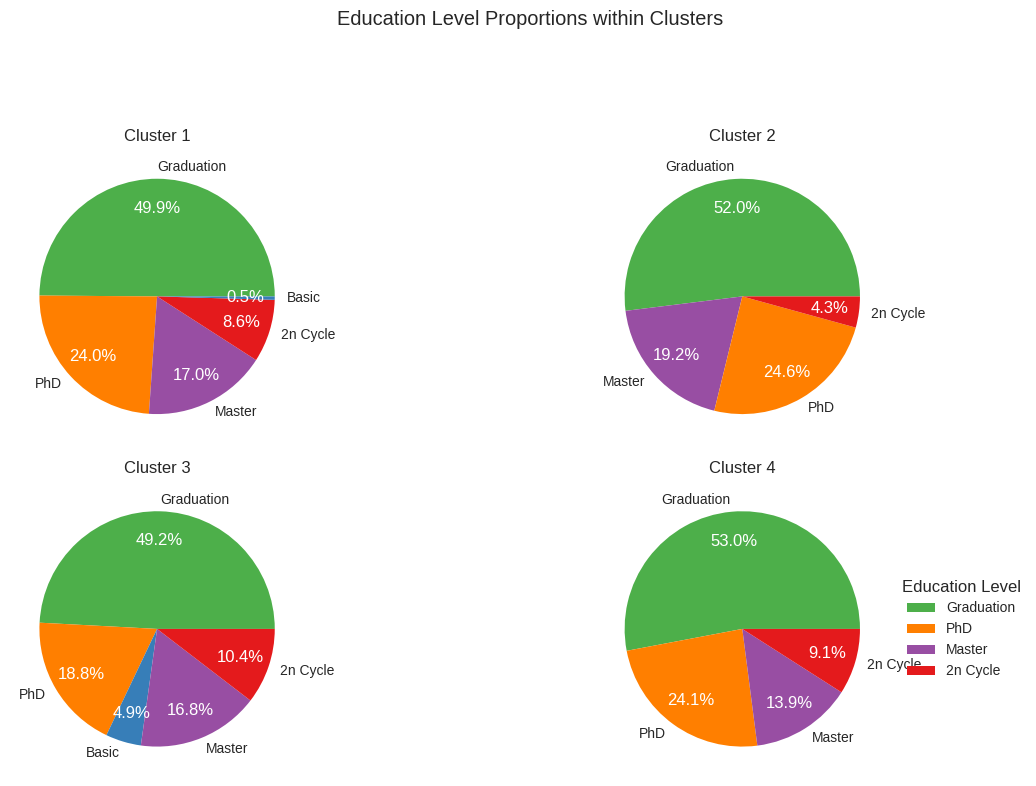

In [88]:
from collections import Counter

# Calculate cluster sizes
cluster_size = dict(clusters['Cluster'].value_counts())

# Define a color palette for education levels
education_levels = sorted(set(clusters['Education']))
education_palette = sns.color_palette("Set1", len(education_levels))
color_dict = dict(zip(education_levels, education_palette))

plt.figure(figsize=(16, 8))

# Iterate over each cluster
for cluster_num in sorted(cluster_size.keys()):
    cluster_data = clusters[clusters['Cluster'] == cluster_num]
    education_counts = dict(Counter(cluster_data['Education']))

    # Calculate proportions
    total = sum(education_counts.values())
    proportions = [count / total for count in education_counts.values()]

    # Plot the pie chart with consistent colors for each label
    ax = plt.subplot(2, 2, cluster_num)
    ax.set_title(f"Cluster {cluster_num}")
    wedges, _, autotexts = ax.pie(proportions, labels=education_counts.keys(), autopct="%.1f%%",
                                  pctdistance=0.75, colors=[color_dict[label] for label in education_counts.keys()])

    # Adjust text properties
    for autotext in autotexts:
        autotext.set_color('white')

# Create a single legend for the education levels
legend_labels = list(education_counts.keys())
plt.legend(wedges, legend_labels, title="Education Level", loc="center left", bbox_to_anchor=(1, 0.5))

plt.suptitle("Education Level Proportions within Clusters")
plt.tight_layout(rect=[0, 0, 0.9, 0.9])
plt.show()

In [90]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Total_Amount_Spent', 'Total_Purchases', 'Childhome',
       'Total_Accepted_Cmp'],
      dtype='object')


In [46]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [47]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
import matplotlib.pyplot as plt
from numpy import sort
from sklearn.feature_selection import SelectFromModel

Total_Accepted_Cmp.columns


In [95]:
print(df['Total_Accepted_Cmp'].values)

[0 0 0 ... 1 0 0]


In [96]:
unique_values = df['Total_Accepted_Cmp'].unique()
num_unique_values = len(unique_values)
if num_unique_values == 2:
    print("The 'Total_Accepted_Cmp' column represents a binary class variable.")
else:
    print("The 'Total_Accepted_Cmp' column does not represent a binary class variable.")


The 'Total_Accepted_Cmp' column represents a binary class variable.


In [98]:

from sklearn.impute import SimpleImputer

# Create a new column for total children at home
df['Childhome'] = df['Kidhome'] + df['Teenhome']

# Create a new DataFrame 'train_df' by dropping unnecessary columns
train_df = df.drop(['Education', 'Marital_Status', 'Dt_Customer', 'Kidhome', 'Teenhome',], axis=1)

# Identify null values in train_df
null_values = train_df.isnull().sum()
print(null_values)

# Fill remaining null values using regression-based mean imputation on 'Income' column
imputer = SimpleImputer(strategy='mean')
train_df['Income'] = imputer.fit_transform(train_df[['Income']])

# Check if any null values remain after imputation
null_values_after_imputation = train_df.isnull().sum()
print(null_values_after_imputation)

ID                     0
Year_Birth             0
Income                 0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
Total_Amount_Spent     0
Total_Purchases        0
Childhome              0
Total_Accepted_Cmp     0
dtype: int64
ID                     0
Year_Birth             0
Income                 0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain    

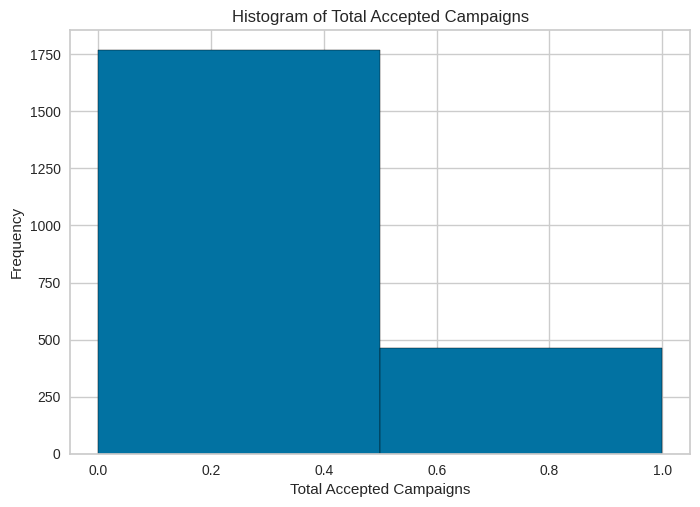

In [99]:
plt.hist(df['Total_Accepted_Cmp'], bins=2, edgecolor='black')
plt.xlabel('Total Accepted Campaigns')
plt.ylabel('Frequency')
plt.title('Histogram of Total Accepted Campaigns')
plt.show()

In [101]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the features and target variable
features = train_df.drop('Total_Accepted_Cmp', axis=1)
target = train_df['Total_Accepted_Cmp']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

# Train the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 84.75%


In [115]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Total_Amount_Spent', 'Total_Purchases', 'Childhome',
       'Total_Accepted_Cmp'],
      dtype='object')


<Figure size 1000x600 with 0 Axes>

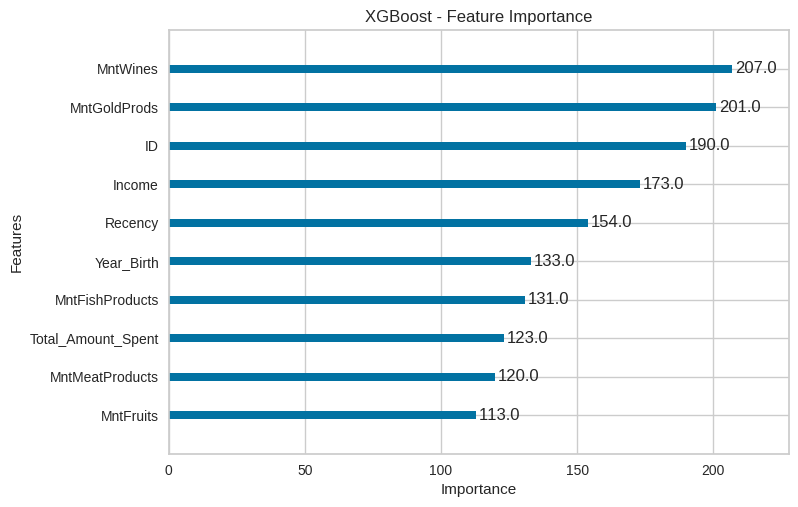

In [117]:
import pandas as pd

# Perform one-hot encoding on categorical columns
X_train_encoded = pd.get_dummies(X_train)

# Train the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train_encoded, y_train)

# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, max_num_features=10)
plt.title('XGBoost - Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Accuracy: 84.75%


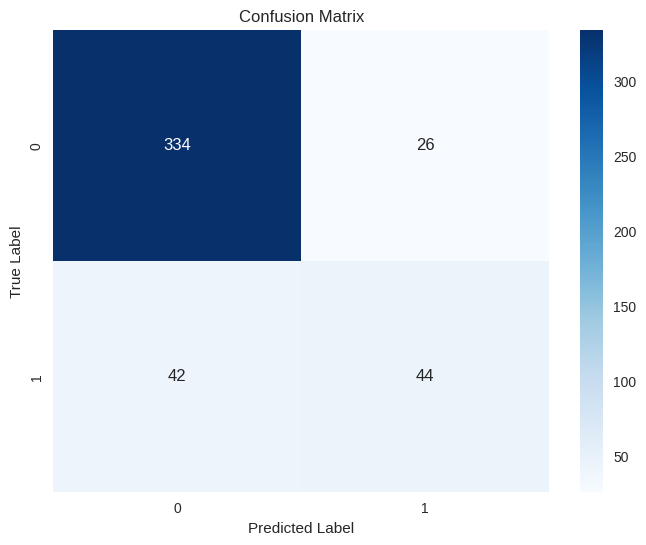

In [127]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features and target variable
features = train_df.drop('Total_Accepted_Cmp', axis=1)
target = train_df['Total_Accepted_Cmp']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

# Train the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [128]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Confusion Matrix:
[[334  26]
 [ 42  44]]
Precision: 0.6285714285714286
Recall: 0.5116279069767442
Accuracy: 0.8475336322869955
F1 Score: 0.5641025641025641


In [130]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 8.3 MB/s eta 0:00:00


In [132]:
import xgboost as xgb
import shap
import graphviz 

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


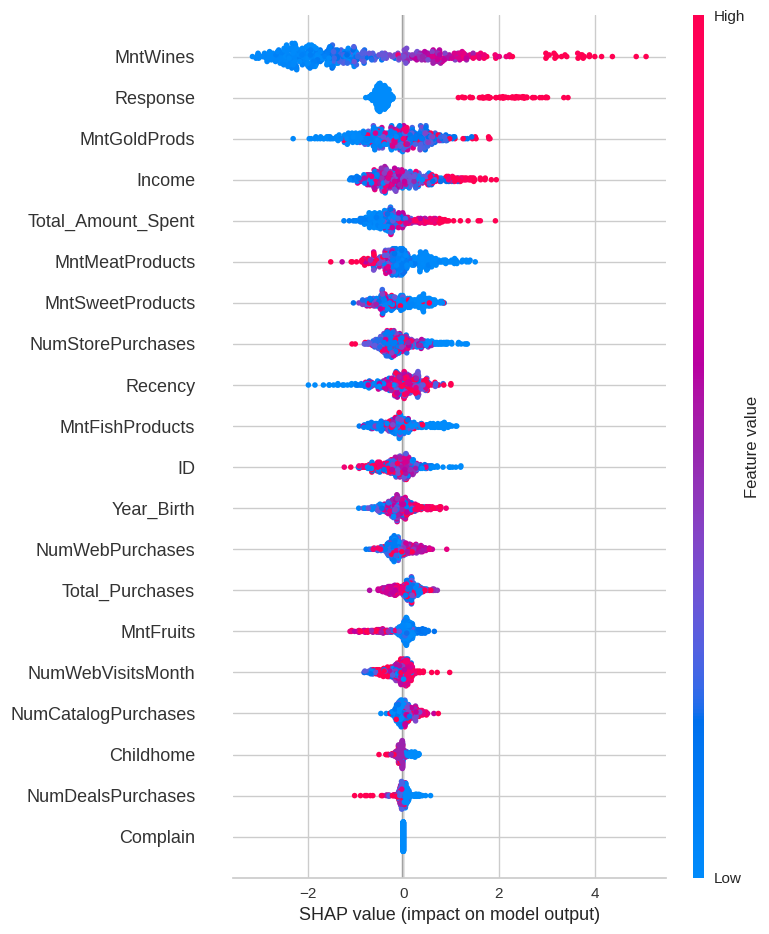

In [136]:
# Define the features and target variable
features = train_df.drop('Total_Accepted_Cmp', axis=1)
target = train_df['Total_Accepted_Cmp']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

# Train the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot a summary plot of the SHAP values
shap.summary_plot(shap_values, X_test)

# You can also plot an individual instance using force_plot
# For example, plotting the first instance in the test set
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

# Calculate the SHAP values for a specific instance
instance_index = 0  # Index of the instance in the test set
shap_instance_values = shap_values[instance_index]


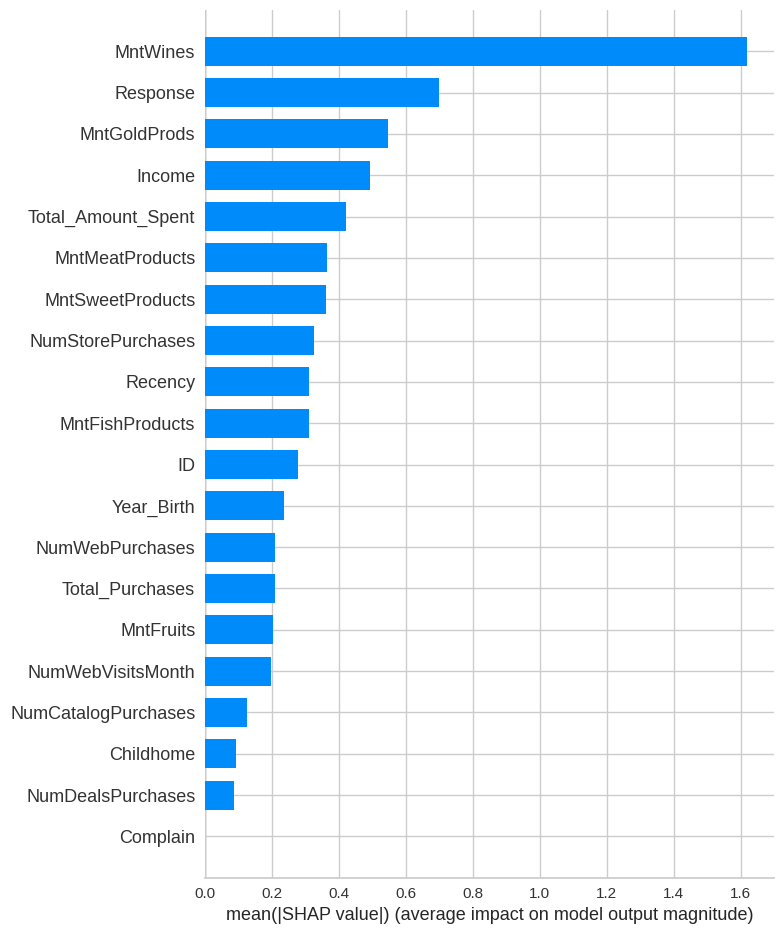

In [139]:
import shap

# Calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Generate summary plot
shap.summary_plot(shap_values, X_test, plot_type='bar')

The SHAP values represent the contribution of each feature towards the prediction of the "Total_Accepted_Cmp" variable, which represents the total accepted campaigns.

Should we target any other variable?

In [ ]:
print(df.head())


In [ ]:
df.head()

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957          2               4  58138.0        0         0   
1  2174        1954          2               4  46344.0        1         1   
2  4141        1965          2               5  71613.0        0         0   
3  6182        1984          2               5  26646.0        1         0   
4  5324        1981          4               3  58293.0        1         0   

   Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  Complain  \
0           80       58       635  ...                  7         0   
1          157       38        11  ...                  5         0   
2          444       26       426  ...                  4         0   
3          199       26        11  ...                  6         0   
4          390       94       173  ...                  5         0   

   Z_CostContact  Z_Revenue  Response  Age  Total_Amount_Spent  \
0              3         11         1   66                1617   
1              3         11         0   69                  27   
2              3         11         0   58                 776   
3              3         11         0   39                  53   
4              3         11         0   42                 422   

   Total_Purchases  Childhome  Total_Accepted_Cmp  
0               22          0                   0  
1                4          2                   0  
2               20          0                   0  
3                6          1                   0  
4               14          1                   0  

[5 rows x 29 columns]

In [118]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Total_Amount_Spent', 'Total_Purchases', 'Childhome',
       'Total_Accepted_Cmp'],
      dtype='object')


In [125]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Get the categorical column names
cat_columns = ['Education', 'Marital_Status', 'Dt_Customer']

# Perform one-hot encoding on the categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=cat_columns)
X_test_encoded = pd.get_dummies(X_test, columns=cat_columns)

# Align the encoded test set with the training set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Create an XGBoost regression model
xgb_model = xgb.XGBRegressor()

# Train the model
xgb_model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.867154316207375


Accuracy: 98.66%


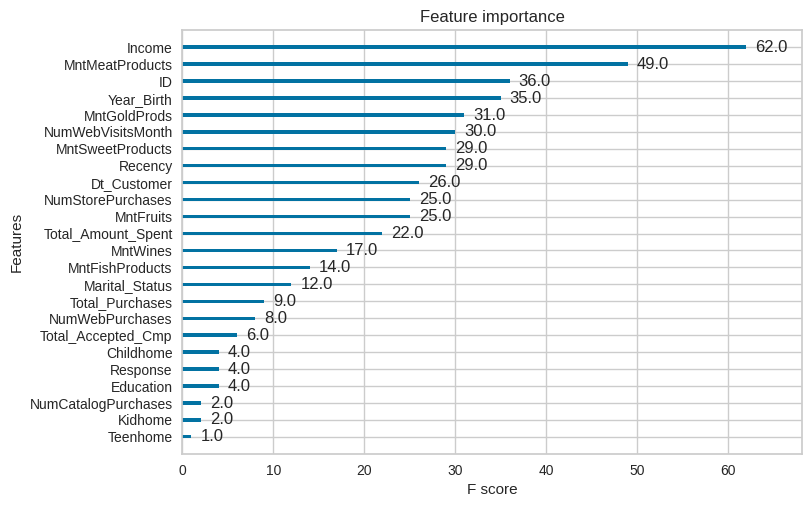

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Train the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Plot feature importance
xgb.plot_importance(model)
plt.show()

The feature importance score represents the contribution of each feature in the model's predictive performance. It helps identify which features have the most impact on the model's predictions.

Accuracy: 98.66%


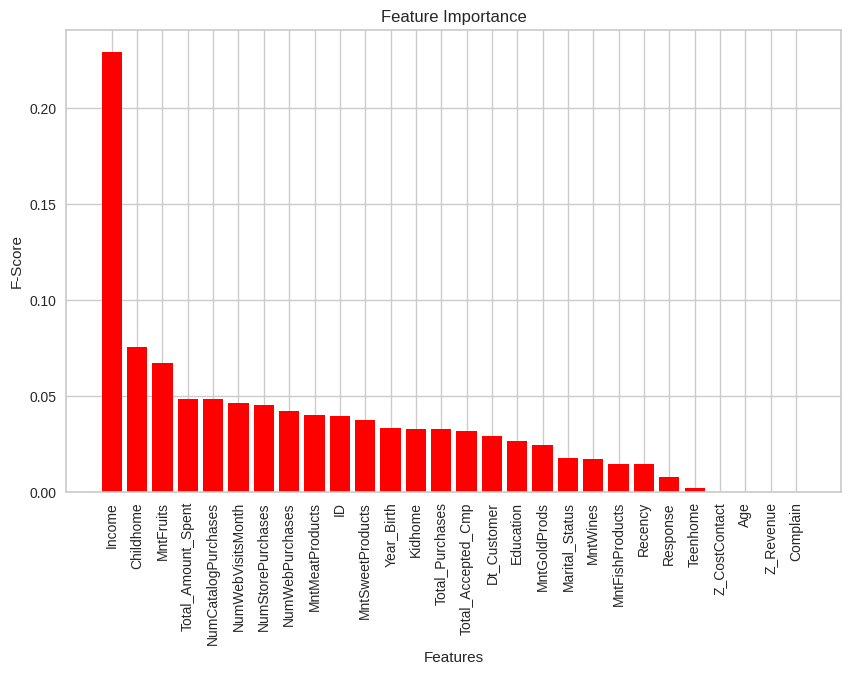

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Train the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Get feature importance scores
importance_scores = model.feature_importances_
feature_names = X_train.columns

# Plot feature importance with same scale as xgb.plot_importance()
sorted_indices = importance_scores.argsort()[::-1]
sorted_importance_scores = importance_scores[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importance_scores)), sorted_importance_scores, color='red')
plt.xticks(range(len(importance_scores)), sorted_feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('F-Score')
plt.title('Feature Importance')
plt.show()

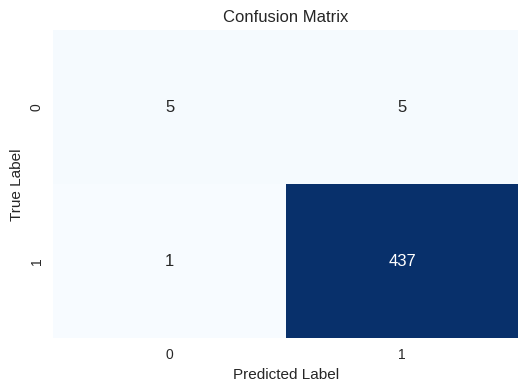

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert target variable to binary class
y_test_binary = np.where(y_test >= 1, 1, 0)
y_pred_binary = np.where(y_pred >= 1, 1, 0)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test_binary, y_pred_binary)

# Calculate accuracy, precision, recall, and F1-score
accuracy = np.round((conf_mat[0, 0] + conf_mat[1, 1]) / np.sum(conf_mat), 2)
precision = np.round(conf_mat[1, 1] / (conf_mat[0, 1] + conf_mat[1, 1]), 2)
recall = np.round(conf_mat[1, 1] / (conf_mat[1, 0] + conf_mat[1, 1]), 2)
f1_score = np.round(2 * precision * recall / (precision + recall), 2)

# Create a classification report
report = classification_report(y_test_binary, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
# Display accuracy, precision, recall, and F1-score
print('Accuracy: {:.2f}%'.format(accuracy * 100))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1-score: {:.2f}'.format(f1_score))

Accuracy: 99.00%
Precision: 0.99
Recall: 1.00
F1-score: 0.99
